In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random 
from datetime import datetime 

In [2]:
def Model2_Simulation(q1, q2, lambda_1, lambda_2, lambda_3, lambda_4, gamma_11, gamma_12, gamma_21, gamma_22, TERM):
    r1 = 1-q1
    r2 = 1-q2
    TNOW = 0  
    Q1 = 0
    Q2 = 0
    Q3 = 0 
    Q4 = 0
    AQ1 = 0 
    AQ2 = 0 
    AQ3=0
    AQ4 = 0 
    
    # Initialise number of iterations to be 0 
    iteration = 0 
    #Initialise number of arrivals, matches and abandonments to be 0 
    Matches_CE = 0
    Matches_EE = 0 
    Matches_JC = 0
    Matches_JE = 0
    
    # (can add in arrivals of C1 and C2 separately if needed)
    Arrivals_CE = 0
    Arrivals_EE = 0 
    Arrivals_JC = 0
    Arrivals_JE = 0
    
    Abandonment_CE = 0
    Abandonment_EE = 0
    Abandonment_JC = 0
    Abandonment_JE = 0
    
     
    # Initalise vector to store the time 
    Time_v = []
    
    # Initialize event calander to be a 4d vector 
    EC= ([0]*5)
    EC[0] = -(np.log(1-np.random.uniform(0, 1))/lambda_1)
    EC[1] = -(np.log(1-np.random.uniform(0, 1))/lambda_2)
    EC[2] = -(np.log(1-np.random.uniform(0, 1))/lambda_3)
    EC[3] = -(np.log(1-np.random.uniform(0, 1))/lambda_4)
    EC[4] = TERM
    EC = np.array(EC)
    
    while TNOW < TERM:
        
        iteration += 1
        
        # Time of next event is minimum entry in event calender
        TNEXT = EC.min()
        
        # Type of next event (index of minimum entry in event calender)
        ENEXT = EC.argmin()
        
        # Update area statistics
        AQ1 += ((TNEXT-TNOW)*Q1)
        AQ2 += ((TNEXT-TNOW)*Q2)
        AQ3 += ((TNEXT-TNOW)*Q3)
        AQ4 += ((TNEXT-TNOW)*Q4)
        
        # Update time vector 
        TNOW = TNEXT
        Time_v = np.append(Time_v, TNOW)
        
        # Next event is arrival of a class 1 CE (Q1)
        if(ENEXT==0):
            
            # Increase CE arrivals by 1
            Arrivals_CE += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are class 2 CEs to match with first check these
            if(Q3 > 0):
                
                # Loop through each C2 CE and check for matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # CE matches with CE and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase CE matches by 2
                        Matches_CE += 1
                        Matches_JC += 1
                        
                        # Update event calender to remove abandonment time of the Q3 (C2 CE)
                        EC = np.delete(EC, (5+Q1+Q2+i))
                
                        break
                    
            # If no matches yet and there are C2 EEs to match with         
            if(Q4 > 0 and m==0):
                
                # Loop through each C2 EE and check for matching 
                for i in range(Q4):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # CE matches with EE and they both leave system 
                        m += 1 
                        Q4 -= 1 
                        
                        # Increase CE and EE matches by 1
                        Matches_CE += 1
                        Matches_JE += 1 
                        
                        # Update event calender to remove abandonment time of the Q4 (C2 EE)
                        EC = np.delete(EC, (5+Q1+Q2+Q3+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived C1 CE (Q1)
                EC=np.insert(EC, (5+Q1), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_11)))
                
                # Joins queue 
                Q1 += 1
                
        # Update EC to include next arrival time of CE
            EC[0]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_1)
        
        # Next event is arrival of a class 1 EE (Q2)
        elif(ENEXT==1):
            
            # Increase EE arrivals by 1
            Arrivals_EE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are JEs to match with first check these
            if(Q4 > 0):
                
                # Loop through each JE and check for matching 
                for i in range(Q4):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # EE matches with EE and they both leave system 
                        m += 1 
                        Q4 -= 1 
                        
                        # Increase EE and JE matches by 1
                        Matches_EE += 1
                        Matches_JE += 1 
                        
                        # Update event calender to remove abandonment time of the Q4 (C2 EE)
                        EC = np.delete(EC, (5+Q1+Q2+Q3+i))
                
                        break
                    
            # If no matches yet and there are JC to match with         
            if(Q3 > 0 and m==0):
                
                # Loop through each JC and check for matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # EE matches with JC and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase EE and JC matches by 
                        Matches_EE += 1
                        Matches_JC += 1
                        
                        # Update event calender to remove abandonment time of the Q3 (JC)
                        EC = np.delete(EC, (5+Q1+Q2+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived C1 CE (Q1)
                EC=np.insert(EC, (5+Q1+Q2), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_12)))
                
                # Joins queue 
                Q2 += 1
                
        # Update EC to include next arrival time of EE
            EC[1]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_2)
        
        # Next event is arrival of a class 2 CE (Q3)
        elif(ENEXT==2):
            
            # Increase JC arrivals by 1
            Arrivals_JC += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are class 1 CEs to match with first check these
            if(Q1 > 0):
                
                # Loop through each C1 CE and check for matching 
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # CE matches with CE and they both leave system 
                        m += 1 
                        Q1 -= 1 
                        
                        # Increase CE matches by 2
                        Matches_CE += 1
                        Matches_JC += 1 
                        
                        # Update event calender to remove abandonment time of the Q1 (C1 CE)
                        EC = np.delete(EC, (5+i))
                
                        break
                    
            # If no matches yet and there are C1 EEs to match with         
            if(Q2 > 0 and m==0):
                
                # Loop through each C1 EE and check for matching 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # CE matches with EE and they both leave system 
                        m += 1 
                        Q2 -= 1 
                        
                        # Increase CE and EE matches by 1
                        Matches_EE += 1
                        Matches_JC += 1 
                        
                        # Update event calender to remove abandonment time of the Q2 (C1 EE)
                        EC = np.delete(EC, (5+Q1+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived C2 CE (Q3)
                EC=np.insert(EC, (5+Q1+Q2+Q3), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_21)))
                
                # Joins queue 
                Q3 += 1
                
        # Update EC to include next arrival time of CE
            EC[2]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_3)
        
        
        # Next event is arrival of a class 2 EE (Q4)
        elif(ENEXT==3):
            
            # Increase EE arrivals by 1
            Arrivals_JE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are JEs to match with first check these
            if(Q2 > 0):
                
                # Loop through each C1 CE and check for matching 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        
                        # JE matches with EE and they both leave system 
                        m += 1 
                        Q2 -= 1 
                        
                        # Increase EE and JE matches by 1
                        Matches_JE += 1
                        Matches_EE += 1 
                        
                        # Update event calender to remove abandonment time of the Q2 (C1 CE)
                        EC = np.delete(EC, (5+Q1+i))
                
                        break
                    
            # If no matches yet and there are CEs to match with         
            if(Q1 > 0 and m==0):
                
                # Loop through each C1 EE and check for matching 
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                        
                        # EE matches with EE and they both leave system 
                        m += 1 
                        Q1 -= 1 
                        
                        # Increase JE and CE matches by 1
                        Matches_CE += 1
                        Matches_JE += 1
                        
                        # Update event calender to remove abandonment time of the Q2 (C1 EE)
                        EC = np.delete(EC, (5+i))
                
                        break
                    
            # If there are no matches found or possible    
            if(m == 0):
                
                # Update EC to inlclude abandonment time of the arrived Q4 (JE)
                EC=np.insert(EC, (5+Q1+Q2+Q3+Q4), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_22)))
                
                # Joins queue 
                Q4 += 1
                
            # Update EC to include next arrival time of EE
            EC[3]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_4)
            
            
        # Next event is abandonment of C1 CE Q1:
        elif((ENEXT>4) and (ENEXT <= (4+Q1))):
            
            # Q1 decreases by 1 
            Q1 -= 1 
            
            # Abandonment increases by 1
            Abandonment_CE += 1
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
        
        # Next event is abandonment of C1 EE (Q2)
        elif((ENEXT>4+Q1) and (ENEXT <= (4+Q1+Q2))):
            
            # Q2 decreases by 1 
            Q2 -= 1 
            
            # Abandonment increases by 1
            Abandonment_EE += 1
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
        
        # Next event is abandonment of JC (Q3)
        elif((ENEXT>4+Q1+Q2) and (ENEXT <= (4+Q1+Q2+Q3))):
            
            # Q3 decreases by 1 
            Q3 -= 1 
            
            # Abandonment increases by 1
            Abandonment_JC += 1
            
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
        
        # Next abandonment of JE (Q4)
        elif((ENEXT>4+Q1+Q2+Q3) and (ENEXT <= (4+Q1+Q2+Q3+Q4))):
            
            # Q4 decreases by 1 
            Q4 -= 1 
            
            # Abandonment increases by 1
            Abandonment_JE += 1
            
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
            
            
        
       
            
    T_Q = AQ1 + AQ2 + AQ3 + AQ4
    
    if(Arrivals_CE > 0):
        CEMatchRate = Matches_CE/Arrivals_CE
        CEAbandonRate = Abandonment_CE/Arrivals_CE
    else:
        CEMatchRate = 0
        CEAbandonRate = 0
        
    if(Arrivals_EE>0):
        EEMatchRate = Matches_EE/Arrivals_EE
        EEAbandonRate = Abandonment_EE/Arrivals_EE
    else:
        EEMatchRate = 0 
        EEAbandonRate = 0
    if(Arrivals_JC > 0):
        JCMatchRate = Matches_JC/Arrivals_JC
        JCAbandonRate = Abandonment_JC/Arrivals_JC
    else:
        JCMatchRate = 0
        JCAbandonRate = 0
    if(Arrivals_JE > 0):
        JEMatchRate = Matches_JE/Arrivals_JE
        JEAbandonRate = Abandonment_JE/Arrivals_JE
    else:
        JEMatchRate = 0
        JEAbandonRate = 0
    if(Arrivals_CE +Arrivals_EE+Arrivals_JC + Arrivals_JE > 0):
        TotalMatchRate = ((Matches_CE+Matches_EE+Matches_JE + Matches_JC)/(Arrivals_CE+Arrivals_EE+Arrivals_JC + Arrivals_JE))
        TotalAbandonRate = ((Abandonment_CE+Abandonment_EE+Abandonment_JC + Abandonment_JE)/(Arrivals_CE+Arrivals_EE+Arrivals_JC + Arrivals_JE))
    else:
        TotalMatchRate = 0
        TotalAbandonRate = 0
        
    Av_AQ1= AQ1/TERM
    Av_AQ2= AQ2/TERM
    Av_AQ3= AQ3/TERM
    Av_AQ4 = AQ4/TERM
    Av_Q_Total= T_Q/TERM
        
    return Av_AQ1, Av_AQ2, Av_AQ3, Av_AQ4, Av_Q_Total, CEMatchRate, EEMatchRate, JCMatchRate, JEMatchRate, TotalMatchRate, CEAbandonRate, EEAbandonRate, JCAbandonRate, JEAbandonRate, TotalAbandonRate


            
            
        
        
        
        
        
        
        
                


        
        
                
        
                


                
        
                


In [3]:
print(datetime. now())
gamma22 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

CE_Match_rates = []
EE_Match_rates = []
JC_Match_rates = []
JE_Match_rates = []
Total_Match_rates = []
CE_Abandon_rates = []
EE_Abandon_rates = []
JC_Abandon_rates = []
JE_Abandon_rates = []
JE_Match_rates = []
Total_Abandon_rates = []
CE_Queue_length = []
EE_Queue_length = []
JC_Queue_length = []
JE_Queue_length =[]
Total_Queue_length = []



for i in range(len(gamma22)):
    print(gamma22[i])
    print(i)
    CE_Rep_m_rate = []
    EE_Rep_m_rate = []
    JC_Rep_m_rate = []
    JE_Rep_m_rate = []
    Total_Rep_m_rate = []
    CE_Rep_a_rate = []
    EE_Rep_a_rate = []
    JC_Rep_a_rate = []
    JE_Rep_a_rate = []
    Total_Rep_a_rate = []
    CE_Rep_q_length = []
    EE_Rep_q_length = []
    JC_Rep_q_length = []
    JE_Rep_q_length = []
    Total_Rep_q_length = []
    
    for j in range(5):
        print(j)
        print(datetime. now())
        rep_results=Job_2type(0.75, 0.5, 1, 1, 1, 1, 0.1, 0.1, 0.05, gamma22[i], 30000)
        CE_Rep_m_rate = np.append(CE_Rep_m_rate, rep_results[5])
        EE_Rep_m_rate = np.append(EE_Rep_m_rate, rep_results[6])
        JC_Rep_m_rate = np.append(JC_Rep_m_rate, rep_results[7])
        JE_Rep_m_rate = np.append(JE_Rep_m_rate, rep_results[8])
        Total_Rep_m_rate = np.append(Total_Rep_m_rate, rep_results[9])
        CE_Rep_a_rate = np.append(CE_Rep_a_rate, rep_results[10])
        EE_Rep_a_rate = np.append(EE_Rep_a_rate, rep_results[11])
        JC_Rep_a_rate = np.append(JC_Rep_a_rate, rep_results[12])
        JE_Rep_a_rate = np.append(JE_Rep_a_rate, rep_results[13])
        Total_Rep_a_rate = np.append(Total_Rep_a_rate, rep_results[14])
        CE_Rep_q_length = np.append(CE_Rep_q_length, rep_results[0])
        EE_Rep_q_length = np.append(EE_Rep_q_length, rep_results[1])
        JC_Rep_q_length = np.append(JC_Rep_q_length, rep_results[2])
        JE_Rep_q_length = np.append(JE_Rep_q_length, rep_results[3])
        Total_Rep_q_length = np.append(Total_Rep_q_length, rep_results[4])
    CE_Match_rates = np.append(CE_Match_rates, np.average(CE_Rep_m_rate))
    EE_Match_rates = np.append(EE_Match_rates, np.average(EE_Rep_m_rate))
    JC_Match_rates = np.append(JC_Match_rates, np.average(JC_Rep_m_rate))
    JE_Match_rates = np.append(JE_Match_rates, np.average(JE_Rep_m_rate))
    Total_Match_rates = np.append(Total_Match_rates, np.average(Total_Rep_m_rate))
    CE_Abandon_rates = np.append(CE_Abandon_rates, np.average(CE_Rep_a_rate))
    EE_Abandon_rates = np.append(EE_Abandon_rates, np.average(EE_Rep_a_rate))
    JC_Abandon_rates = np.append(JC_Abandon_rates, np.average(JC_Rep_a_rate))
    JE_Abandon_rates = np.append(JE_Abandon_rates, np.average(JE_Rep_a_rate))
    Total_Abandon_rates = np.append(Total_Abandon_rates, np.average(Total_Rep_a_rate))
    CE_Queue_length = np.append(CE_Queue_length, np.average(CE_Rep_q_length))
    EE_Queue_length = np.append(EE_Queue_length, np.average(EE_Rep_q_length))
    JC_Queue_length = np.append(JC_Queue_length, np.average(JC_Rep_q_length))
    JE_Queue_length = np.append(JE_Queue_length, np.average(JE_Rep_q_length))
    Total_Queue_length = np.append(Total_Queue_length, np.average(Total_Rep_q_length))
    
    print(CE_Match_rates)
    print(EE_Match_rates)
    print(JC_Match_rates)
    print(JE_Match_rates)
    print(Total_Match_rates)
    print(CE_Abandon_rates)
    print(EE_Abandon_rates)
    print(JC_Abandon_rates)
    print(JE_Abandon_rates)
    print(Total_Abandon_rates)
    print(CE_Queue_length)
    print(EE_Queue_length)
    print(JC_Queue_length)
    print(JE_Queue_length)
    print(Total_Queue_length)

    
    
print(datetime. now())   

2023-08-16 09:42:06.883517
0
0
0
2023-08-16 09:42:06.885936


/Users/corinnephillips/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:343: RuntimeWarning: divide by zero encountered in double_scalars


1
2023-08-16 09:42:21.921570
2
2023-08-16 09:42:37.455702
3
2023-08-16 09:42:53.245376
4
2023-08-16 09:43:07.121336
[0.94548895]
[0.94580885]
[0.8925412]
[0.99983461]
[0.9460222]
[0.05449784]
[0.05415802]
[0.10733813]
[0.]
[0.05389459]
[0.54335463]
[0.53373056]
[2.1443714]
[5.25475372]
[8.47621031]
0.1
1
0
2023-08-16 09:43:22.366296
1
2023-08-16 09:43:37.524059
2
2023-08-16 09:43:57.587934
3
2023-08-16 09:44:15.519647
4
2023-08-16 09:44:31.602732
[0.94548895 0.91196188]
[0.94580885 0.91101916]
[0.8925412  0.93400351]
[0.99983461 0.89313361]
[0.9460222 0.9125174]
[0.05449784 0.08798485]
[0.05415802 0.08894116]
[0.10733813 0.06592983]
[0.         0.10679997]
[0.05389459 0.08742599]
[0.54335463 0.88609586]
[0.53373056 0.8992062 ]
[2.1443714  1.30057122]
[5.25475372 1.07815437]
[8.47621031 4.16402765]
0.2
2
0
2023-08-16 09:44:47.881038
1
2023-08-16 09:45:04.117829
2
2023-08-16 09:45:18.810989
3
2023-08-16 09:45:36.323702
4
2023-08-16 09:45:53.420600
[0.94548895 0.91196188 0.90045122]
[0.94

1
2023-08-16 09:53:37.119971
2
2023-08-16 09:53:52.367167
3
2023-08-16 09:54:07.304044
4
2023-08-16 09:54:21.515022
[0.94548895 0.91196188 0.90045122 0.89056782 0.89088943 0.88439376
 0.87987763 0.8791188  0.87603008 0.87259944]
[0.94580885 0.91101916 0.90063419 0.89157299 0.88918536 0.88304397
 0.87725903 0.87816264 0.87357868 0.87108718]
[0.8925412  0.93400351 0.94526429 0.95335737 0.9572314  0.96105648
 0.96355058 0.96586899 0.96864439 0.96924604]
[0.99983461 0.89313361 0.85452172 0.834773   0.81420712 0.80430032
 0.79750145 0.78596114 0.78614876 0.78189709]
[0.9460222  0.9125174  0.90016601 0.89252369 0.88782451 0.88312754
 0.87957182 0.87737069 0.87606764 0.87373193]
[0.05449784 0.08798485 0.09954213 0.10940563 0.10907062 0.11557956
 0.12006254 0.12086117 0.12392339 0.127334  ]
[0.05415802 0.08894116 0.09933905 0.1083735  0.11072181 0.11692259
 0.12270073 0.12182394 0.12638153 0.12885286]
[0.10733813 0.06592983 0.05470894 0.04663597 0.0427686  0.03894352
 0.03638976 0.03411771 0.0

In [4]:
print(CE_Match_rates)
print(EE_Match_rates)
print(JC_Match_rates)
print(JE_Match_rates)
print(Total_Match_rates)
print(CE_Abandon_rates)
print(EE_Abandon_rates)
print(JC_Abandon_rates)
print(JE_Abandon_rates)
print(Total_Abandon_rates)
print(CE_Queue_length)
print(EE_Queue_length)
print(JC_Queue_length)
print(JE_Queue_length)
print(Total_Queue_length)

[0.94548895 0.91196188 0.90045122 0.89056782 0.89088943 0.88439376
 0.87987763 0.8791188  0.87603008 0.87259944 0.87414266]
[0.94580885 0.91101916 0.90063419 0.89157299 0.88918536 0.88304397
 0.87725903 0.87816264 0.87357868 0.87108718 0.870872  ]
[0.8925412  0.93400351 0.94526429 0.95335737 0.9572314  0.96105648
 0.96355058 0.96586899 0.96864439 0.96924604 0.96959661]
[0.99983461 0.89313361 0.85452172 0.834773   0.81420712 0.80430032
 0.79750145 0.78596114 0.78614876 0.78189709 0.7685698 ]
[0.9460222  0.9125174  0.90016601 0.89252369 0.88782451 0.88312754
 0.87957182 0.87737069 0.87606764 0.87373193 0.87083176]
[0.05449784 0.08798485 0.09954213 0.10940563 0.10907062 0.11557956
 0.12006254 0.12086117 0.12392339 0.127334   0.12576374]
[0.05415802 0.08894116 0.09933905 0.1083735  0.11072181 0.11692259
 0.12270073 0.12182394 0.12638153 0.12885286 0.12901418]
[0.10733813 0.06592983 0.05470894 0.04663597 0.0427686  0.03894352
 0.03638976 0.03411771 0.03132231 0.03070707 0.03040339]
[0.     

In [2]:
# Results 

gamma22 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
CE_Match_rates = [0.94548895, 0.91196188, 0.90045122, 0.89056782, 0.89088943, 0.88439376, 0.87987763, 0.8791188, 0.87603008, 0.87259944, 0.87414266]
EE_Match_rates = [0.94580885, 0.91101916, 0.90063419, 0.89157299, 0.88918536, 0.88304397, 0.87725903, 0.87816264, 0.87357868, 0.87108718, 0.870872]
JC_Match_rates = [0.8925412, 0.93400351, 0.94526429, 0.95335737, 0.9572314, 0.96105648, 0.96355058, 0.96586899, 0.96864439, 0.96924604, 0.96959661]
JE_Match_rates = [0.99983461, 0.89313361, 0.85452172, 0.834773, 0.81420712, 0.80430032, 0.79750145, 0.78596114, 0.78614876, 0.78189709, 0.7685698]
Total_Match_rates = [0.9460222, 0.9125174, 0.90016601, 0.89252369, 0.88782451, 0.88312754, 0.87957182, 0.87737069, 0.87606764, 0.87373193, 0.87083176]

CE_Abandon_rates = [0.05449784, 0.08798485, 0.09954213, 0.10940563, 0.10907062, 0.11557956, 0.12006254, 0.12086117, 0.12392339, 0.127334, 0.12576374]
EE_Abandon_rates = [0.05415802, 0.08894116, 0.09933905, 0.1083735, 0.11072181, 0.11692259, 0.12270073, 0.12182394, 0.12638153, 0.12885286, 0.12901418]
JC_Abandon_rates = [0.10733813, 0.06592983, 0.05470894, 0.04663597, 0.0427686, 0.03894352, 0.03638976, 0.03411771, 0.03132231, 0.03070707, 0.03040339]
JE_Abandon_rates = [0.0, 0.10679997, 0.14541818, 0.165227, 0.18576641, 0.19569968, 0.20247182, 0.2140322, 0.21384459, 0.21810291, 0.2314302]
Total_Abandon_rates = [0.05389459, 0.08742599, 0.09980397, 0.10745462, 0.11213563, 0.11685742, 0.12038158, 0.12261597, 0.12390073, 0.12622464, 0.12911655]

CE_Queue_length = [0.54335463, 0.88609586, 1.00017008, 1.08929713, 1.08676543, 1.14433604, 1.18654194, 1.21021296, 1.25378906, 1.2823882, 1.26423838]
EE_Queue_length = [0.53373056, 0.8992062, 0.99678381, 1.07806727, 1.09807495, 1.16891608, 1.22756943, 1.22940965, 1.27259821, 1.28704671, 1.2683031]
JC_Queue_length = [2.1443714, 1.30057122, 1.07786756, 0.93477478, 0.89102888, 0.76995991, 0.71943624, 0.70377726, 0.65622676, 0.60640976, 0.61297365]
JE_Queue_length = [5.25475372, 1.07815437, 0.73069251, 0.54976908, 0.46462836, 0.38829897, 0.3372338, 0.30590297, 0.26882642, 0.24272773, 0.23137425]
Total_Queue_length = [8.47621031, 4.16402765, 3.80551396, 3.65190825, 3.54049763, 3.471511, 3.47078141, 3.44930284, 3.45144044, 3.4185724, 3.37688939]


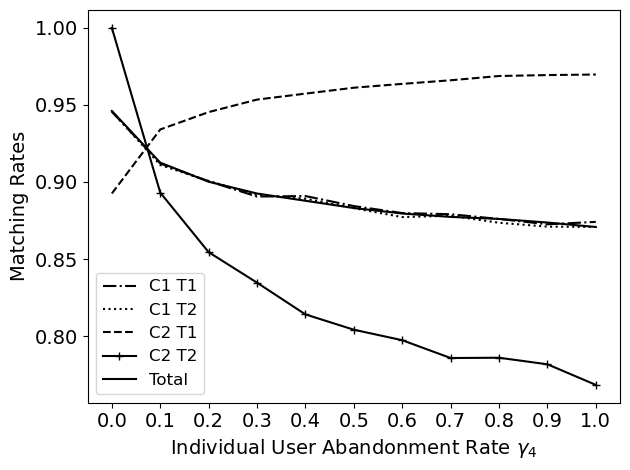

In [3]:
plt.xlabel(r'Individual User Abandonment Rate $\gamma_4$', fontsize=14)
plt.ylabel('Matching Rates', fontsize=14)
plt.plot(gamma22, CE_Match_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(gamma22, EE_Match_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(gamma22, JC_Match_rates,  linestyle='dashed', label = 'C2 T1', color='black')
plt.plot(gamma22, JE_Match_rates,  linestyle='solid', marker='+' , label = 'C2 T2', color='black')
plt.plot(gamma22, Total_Match_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(gamma22, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp18_Match.png')
plt.show()

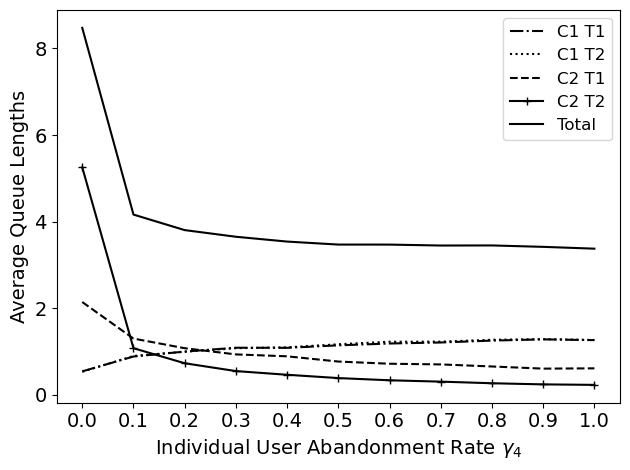

In [4]:
plt.xlabel(r'Individual User Abandonment Rate $\gamma_4$', fontsize=14)
plt.ylabel('Average Queue Lengths', fontsize=14)
plt.plot(gamma22, CE_Queue_length, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(gamma22, EE_Queue_length, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(gamma22, JC_Queue_length,  linestyle='dashed', label = 'C2 T1', color='black')
plt.plot(gamma22, JE_Queue_length,  linestyle='solid', marker='+' , label = 'C2 T2', color='black')
plt.plot(gamma22, Total_Queue_length, linestyle='solid', label = 'Total', color='black')
plt.xticks(gamma22, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp18_Queue.png')
plt.show()



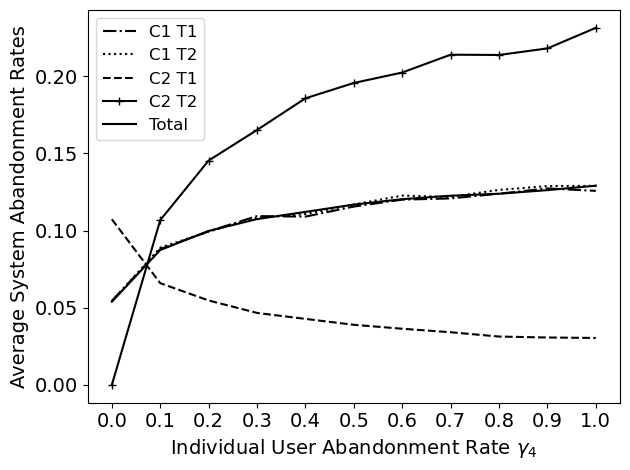

In [5]:
plt.xlabel(r'Individual User Abandonment Rate $\gamma_4$', fontsize=14)
plt.ylabel('Average System Abandonment Rates', fontsize=14)
plt.plot(gamma22, CE_Abandon_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(gamma22, EE_Abandon_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(gamma22, JC_Abandon_rates, linestyle='dashed', label = 'C2 T1', color='black')
plt.plot(gamma22, JE_Abandon_rates,  linestyle='solid', marker='+' , label = 'C2 T2', color='black')
plt.plot(gamma22, Total_Abandon_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(gamma22, fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(gamma22, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp18_Abandon.png')
plt.show()



